# **Machine Learning Methods using German Credit Data**

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision –

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank.\

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants.

https://www.openml.org/search?type=data&sort=runs&id=31&status=active

## **Data Import and Initial Data Analysis**

In [1]:
import pandas as pd
import json
import os
import urllib.request# import libraires 
from matplotlib import pyplot as plt

In [2]:
def getdata (filepath):
    with open (filepath,'r') as f:
        data = json.load(f)

    df = pd.DataFrame(data)
    return df

In [3]:
os.getcwd()

'a:\\Dominic\\My Projects\\German Credit'

In [4]:
file=os.getcwd()+"\\german_credit_data.json"

In [5]:
df = getdata(file)

In [6]:
df.shape

(1000, 21)

In [7]:
df.head()

,age,checking_status,class,credit_amount,credit_history,duration,employment,existing_credits,foreign_worker,housing,...,job,num_dependents,other_parties,other_payment_plans,own_telephone,personal_status,property_magnitude,purpose,residence_since,savings_status
0,67,<0,good,1169,critical/other existing credit,6,>=7,2,yes,own,...,skilled,1,none,none,yes,male single,real estate,radio/tv,4,no known savings
1,22,0<=X<200,bad,5951,existing paid,48,1<=X<4,1,yes,own,...,skilled,1,none,none,none,female div/dep/mar,real estate,radio/tv,2,<100
2,49,no checking,good,2096,critical/other existing credit,12,4<=X<7,1,yes,own,...,unskilled resident,2,none,none,none,male single,real estate,education,3,<100
3,45,<0,good,7882,existing paid,42,4<=X<7,1,yes,for free,...,skilled,2,guarantor,none,none,male single,life insurance,furniture/equipment,4,<100
4,53,<0,bad,4870,delayed previously,24,1<=X<4,2,yes,for free,...,skilled,2,none,none,none,male single,no known property,new car,4,<100


In [8]:
print(df.columns)

Index(['age', 'checking_status', 'class', 'credit_amount', 'credit_history',
       'duration', 'employment', 'existing_credits', 'foreign_worker',
       'housing', 'installment_commitment', 'job', 'num_dependents',
       'other_parties', 'other_payment_plans', 'own_telephone',
       'personal_status', 'property_magnitude', 'purpose', 'residence_since',
       'savings_status'],
      dtype='object')


In [9]:
def rename_data(df, rename_dict):

    df.rename(columns=rename_dict, inplace=True)#rename columns
    
    return df


In [10]:
cols = {'class':'credit_class','checking_status': 'account_bal', 'other_parties':'guarantors', 'savings_status':'savings_value'}
df = rename_data(df, cols)

In [11]:
df['credit_amount'] = df['credit_amount'].astype(float)

In [12]:
df.dtypes

age                         int64
account_bal                object
credit_class               object
credit_amount             float64
credit_history             object
duration                    int64
employment                 object
existing_credits            int64
foreign_worker             object
housing                    object
installment_commitment      int64
job                        object
num_dependents              int64
guarantors                 object
other_payment_plans        object
own_telephone              object
personal_status            object
property_magnitude         object
purpose                    object
residence_since             int64
savings_value              object
dtype: object

In [13]:
df.isnull().sum(axis=0)

age                       0
account_bal               0
credit_class              0
credit_amount             0
credit_history            0
duration                  0
employment                0
existing_credits          0
foreign_worker            0
housing                   0
installment_commitment    0
job                       0
num_dependents            0
guarantors                0
other_payment_plans       0
own_telephone             0
personal_status           0
property_magnitude        0
purpose                   0
residence_since           0
savings_value             0
dtype: int64

Lets summarise few numerical columns

In [14]:
df.describe()

,age,credit_amount,duration,existing_credits,installment_commitment,num_dependents,residence_since
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000,1.407000,2.973000,1.155000,2.845000
std,11.375469,2822.736876,12.058814,0.577654,1.118715,0.362086,1.103718
min,19.000000,250.000000,4.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,1365.500000,12.000000,1.000000,2.000000,1.000000,2.000000
50%,33.000000,2319.500000,18.000000,1.000000,3.000000,1.000000,3.000000
75%,42.000000,3972.250000,24.000000,2.000000,4.000000,1.000000,4.000000
max,75.000000,18424.000000,72.000000,4.000000,4.000000,2.000000,4.000000


## **Exploratory Data Analysis**

### Credit amount

In [15]:
# average value of Credit amount?
calc = df["credit_amount"].describe()
print('\nAverage Credit amount summary staatistics:\n')
print(calc)


Average Credit amount summary staatistics:

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64


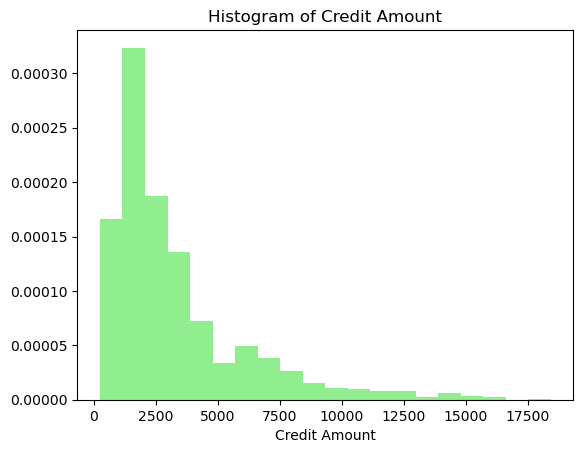

In [16]:
plt.hist(df['credit_amount'], bins=20, color='lightgreen',  density=True)
plt.xlabel("Credit Amount")
plt.title("Histogram of Credit Amount")

plt.show()

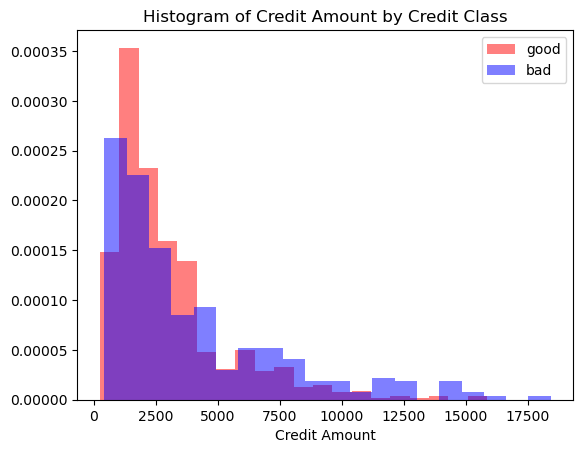

In [17]:
# plot the share of population in different classes of credit Amount

plt.hist(df[df.credit_class=='good']['credit_amount'],  bins=20, alpha=0.5, label='good', color='red',density=True)
plt.hist(df[df.credit_class=='bad']['credit_amount'],  bins=20, alpha=0.5, label='bad', color='blue',density=True)
plt.xlabel("Credit Amount")
plt.legend()
plt.title("Histogram of Credit Amount by Credit Class")

plt.show()

### age

In [18]:
# what is the average value of age?
calc = df["age"].describe()
print('\nAverage Age')
print(calc)


Average Age
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


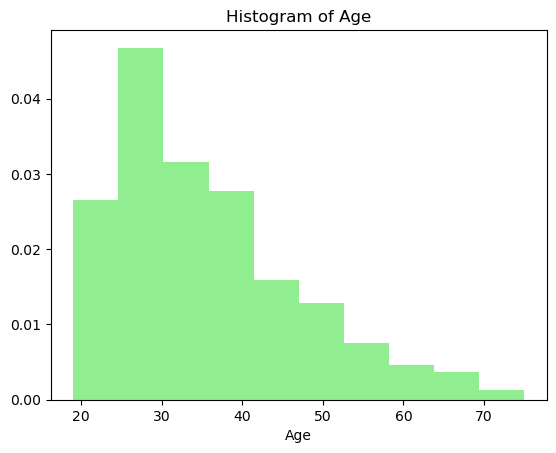

In [19]:
plt.hist(df['age'], color='lightgreen',  density=True)
plt.xlabel("Age")
plt.title("Histogram of Age")

plt.show()

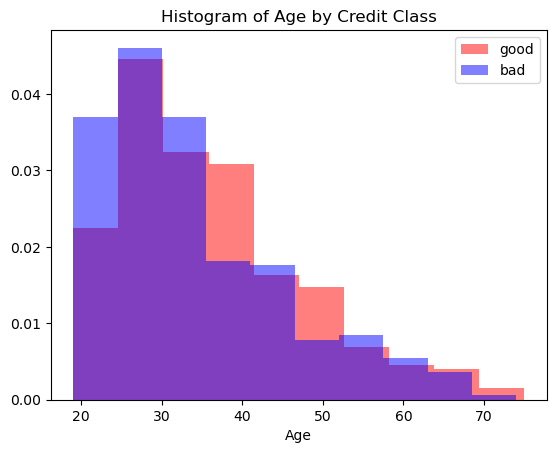

In [20]:
# plot the share of population in different classes of credit Amount

plt.hist(df[df.credit_class=='good']['age'], alpha=0.5, label='good', color='red',density=True)
plt.hist(df[df.credit_class=='bad']['age'], alpha=0.5, label='bad', color='blue',density=True)
plt.xlabel("Age")
plt.legend()
plt.title("Histogram of Age by Credit Class")

plt.show()

### duration

In [21]:
# what is the average value of duration?
calc = df["duration"].describe()
print('\nAverage Duration in months')
print(calc)


Average Duration in months
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64


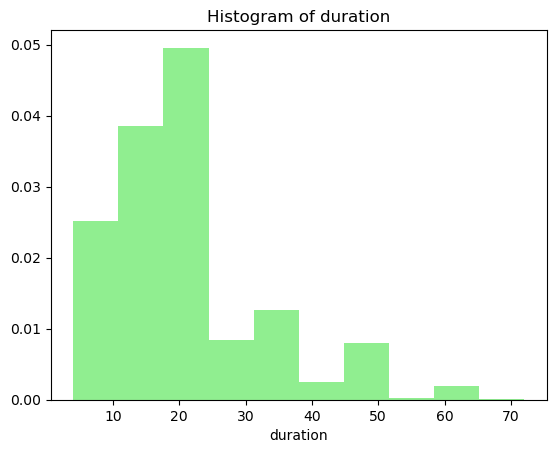

In [22]:
plt.hist(df['duration'], color='lightgreen',  density=True)
plt.xlabel("duration")
plt.title("Histogram of duration")

plt.show()

In [23]:
# what is the average value of  duration by credit class?
calc = df.groupby(['credit_class']).agg(Mean = ('duration', 'mean'),
                                        Std = ('duration', 'std')).reset_index()
print('\nAverage duration by credit class')
print(calc)


Average duration by credit class
  credit_class       Mean        Std
0          bad  24.860000  13.282639
1         good  19.207143  11.079564


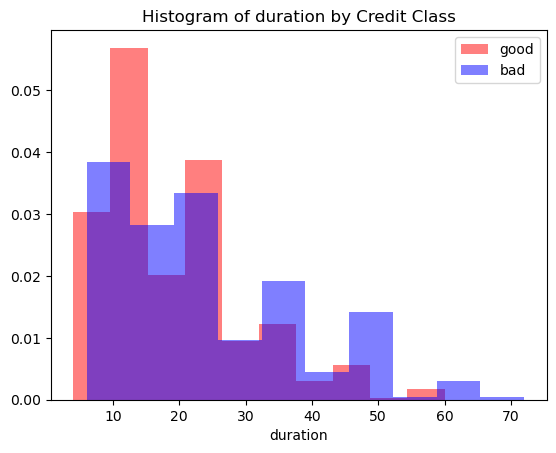

In [24]:
# plot the share of population in different classes of credit Amount

plt.hist(df[df.credit_class=='good']['duration'], alpha=0.5, label='good', color='red',density=True)
plt.hist(df[df.credit_class=='bad']['duration'], alpha=0.5, label='bad', color='blue',density=True)
plt.xlabel("duration")
plt.legend()
plt.title("Histogram of duration by Credit Class")

plt.show()

They also tend to have smaller duration of credit. The histogram of bad customers is clearly more skewed to the right that that of good customers

### credit class

what is the distribution of good and bad customers in the data.


Average Age by credit_class
credit_class
bad     0.3
good    0.7
Name: age, dtype: float64


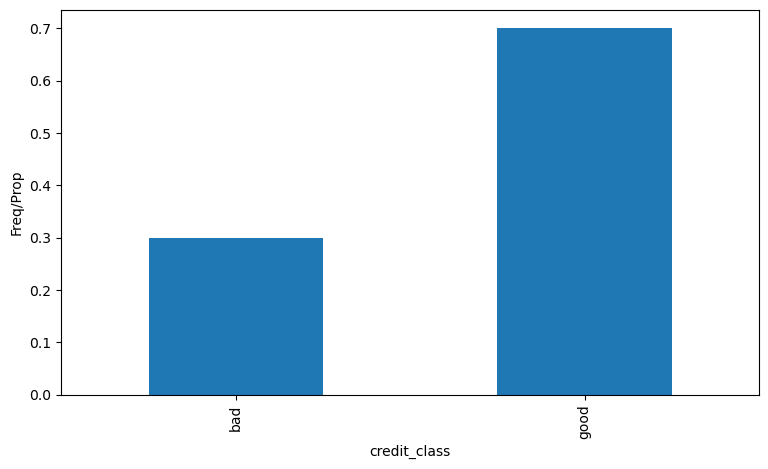

In [25]:
calc = round(df.groupby(['credit_class'])["age"].count()/df.shape[0], 2)
print('\nAverage Age by credit_class')
print(calc)

fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Freq/Prop')
calc.plot(ax = ax, kind='bar', xlabel='credit_class')
plt.show()

In [26]:

# function groupby_counts to calculate the counts and default rates for categorical variables
def groupby_counts(df, var, desired_order=None):
    df_var =  df.groupby([var]).agg(    
        Total = (var, 'count'),
        good = ('credit_class', lambda x: (x == 'good').sum()),
        bad = ('credit_class', lambda x: (x == 'bad').sum()),
        DefaultRate = ('credit_class', lambda x: (x == 'bad').sum() / len(x))
        ).reset_index()
    
    if desired_order is not None:
        df_var[var] = pd.Categorical(df_var[var], categories=desired_order, ordered=True)

    df_var = df_var.sort_values(var).reset_index(drop=True)
    return df_var

# function plot_distribution to plot the distribution and default rates for categorical variables
def plot_distribution(df_var, var):
    
    plt.figure(figsize=(10,5))
    plt.bar(df_var[var], df_var['Total'])
    plt.xlabel(var, fontsize=14)
    plt.xticks(rotation=30)
    plt.ylabel('Count')
    plt.title('Distribution of '+var, fontsize=16, fontweight='bold')

    # Add secondary y-axis for DefaultRate
    ax2 = plt.twinx()
    ax2.plot(df_var[var], df_var['DefaultRate'], color='red', marker='o', label='Default Rate')
    ax2.set_ylabel('Default Rate')

    plt.show()


### Account Balance

**Levels** 

'no checking' : No Account\
'<0' : No balance or debit\
'0<=X<200' : 0 to 200DM\
'>=200' : greater than or equal to 200 DM

In [27]:
df_account_bal =  groupby_counts(df, 'account_bal', ['no checking', '<0', '0<=X<200', '>=200'])
print('\nDistribution of account_bal:\n')
print(df_account_bal)


Distribution of account_bal:

   account_bal  Total  good  bad  DefaultRate
0  no checking    394   348   46     0.116751
1           <0    274   139  135     0.492701
2     0<=X<200    269   164  105     0.390335
3        >=200     63    49   14     0.222222


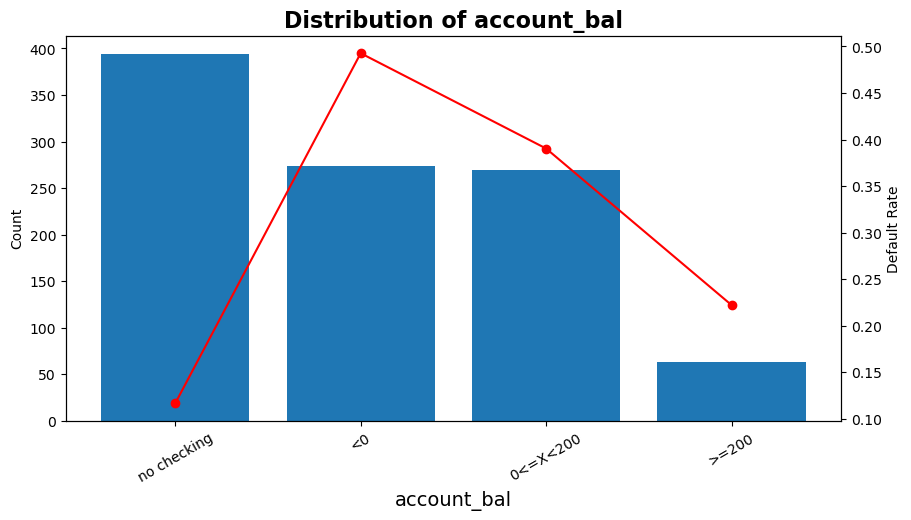

In [28]:
plot_distribution(df_account_bal, 'account_bal')

The graph shows that for a good customers, it is more likely to be in group account balance No account or No balance. For bad customers, they are more likely to be in No account or 0 to 200 DM.




In [29]:
df['account_bal_new'] = df['account_bal'].replace({'<0': '<200', '0<=X<200': '<200'})

### credit history

critical/other existing credit\
existing paid\
delayed previously\
no credits/all paid\
all paid


In [30]:
df_credit_history =  groupby_counts(df, 'credit_history', ['no credits/all paid', 'all paid', 'existing paid','delayed previously', 'critical/other existing credit'])
print('\nDistribution of credit_history:\n')
print(df_credit_history)


Distribution of credit_history:

                   credit_history  Total  good  bad  DefaultRate
0             no credits/all paid     40    15   25     0.625000
1                        all paid     49    21   28     0.571429
2                   existing paid    530   361  169     0.318868
3              delayed previously     88    60   28     0.318182
4  critical/other existing credit    293   243   50     0.170648


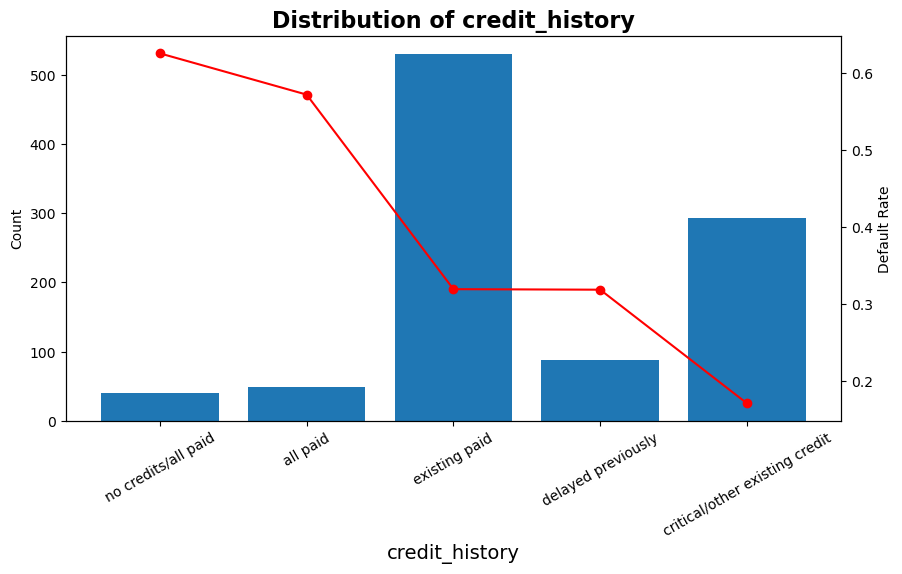

In [31]:
plot_distribution(df_credit_history, 'credit_history')

From the figure it can be seen that for good customers, it is more likley to be in group 3

For bad customers, majority are in 3rd group 'existing paid' but a significant large majority also falls in last group 'critical/other existing credit'. 

In [32]:
df['credit_history_new'] = df['credit_history'].replace({'all paid': 'no credits/all paid', 'existing paid': 'existing paid/delayed previously', 'delayed previously': 'existing paid/delayed previously'})

### Personal status

male single: male single\
male div/sep: male divorced / living apart\
male mar/wid :male married / widowed\
female div/dep/mar: female



In [33]:
df_personal_status =  groupby_counts(df, 'personal_status')
print('\nDistribution of personal_status:\n')
print(df_personal_status)


Distribution of personal_status:

      personal_status  Total  good  bad  DefaultRate
0  female div/dep/mar    310   201  109     0.351613
1        male div/sep     50    30   20     0.400000
2        male mar/wid     92    67   25     0.271739
3         male single    548   402  146     0.266423


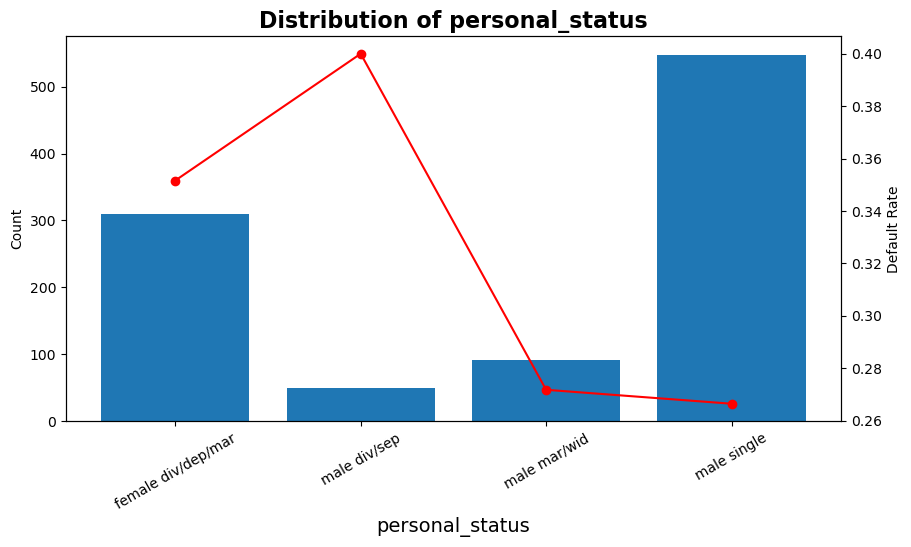

In [34]:
plot_distribution(df_personal_status, 'personal_status')

We see that in bothgood and bad customers, you are more likely to be either single male (3) or a female. Personal status does not seem to have any influence on the creditability of a customer as there doesn't appear to be a huge variation in creditability in the distribution across the groups.

In [35]:
df['personal_status_new'] = df['personal_status'].replace({'male mar/wid': 'male mar/wid/single', 'male single': 'male mar/wid/single'})

### Number of Dependents

2: 0 to 2\
1: 3 and more

In [36]:
df_num_dependents =  groupby_counts(df, 'num_dependents')
df_num_dependents['num_dependents'] = df_num_dependents['num_dependents'].astype(str)
print('\nDistribution of num_dependents:\n')
print(df_num_dependents)


Distribution of num_dependents:

  num_dependents  Total  good  bad  DefaultRate
0              1    845   591  254     0.300592
1              2    155   109   46     0.296774


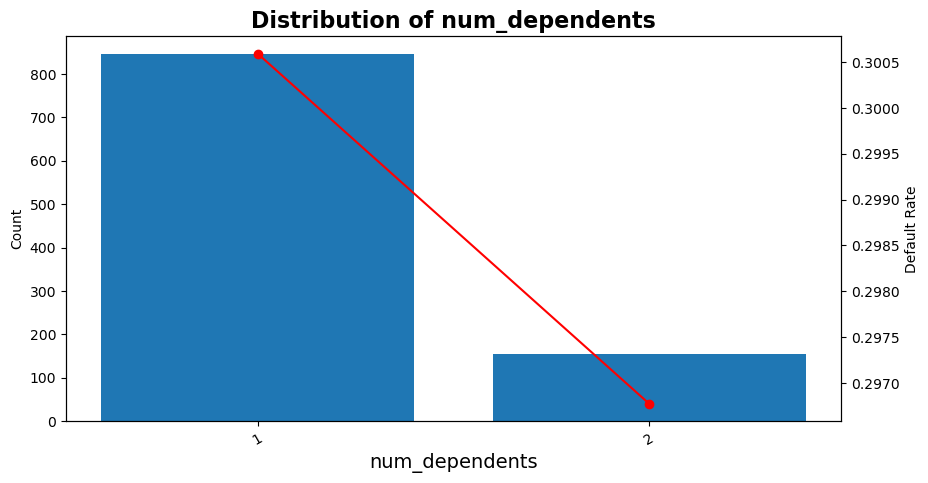

In [37]:
plot_distribution(df_num_dependents, 'num_dependents')

From the figure, there doesn't appear to be any dependence between number of dependents and creditability. Someone with good credit score is as likely to have any number of dependents as bad customers.

### Value of Savings

'no known savings'\
'<100'\
'100<=X<500'\
'500<=X<1000'\
'>=1000'

In [38]:
df_savings_value =  groupby_counts(df, 'savings_value',['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'])
print('\nDistribution of savings_value:\n')
print(df_savings_value)


Distribution of savings_value:

      savings_value  Total  good  bad  DefaultRate
0  no known savings    183   151   32     0.174863
1              <100    603   386  217     0.359867
2        100<=X<500    103    69   34     0.330097
3       500<=X<1000     63    52   11     0.174603
4            >=1000     48    42    6     0.125000


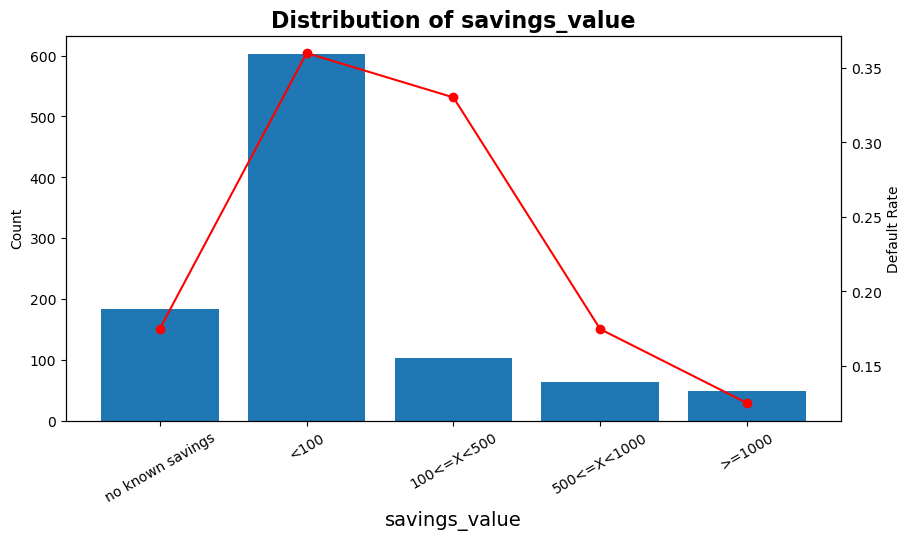

In [39]:
plot_distribution(df_savings_value, 'savings_value')

Good Customers are more likely to have savings <100 or no savings. This is the same with bad customers as well. 

Value of savings does not seem to have any influence on the creditability of a customer as there doesn't appear to be a huge variation in creditability in the distribution across the groups.

In [40]:
df['savings_value_new'] = df['savings_value'].replace({'<100': '<500', '100<=X<500': '<500', '500<=X<1000': '>=500', '>=1000': '>=500'})

### Job category

'skilled'\
'unskilled resident'\
'unskilled resident'\
'unemp/unskilled non res'

In [41]:
df_job =  groupby_counts(df, 'job')
print('\nDistribution of job:\n')
print(df_job)


Distribution of job:

                         job  Total  good  bad  DefaultRate
0  high qualif/self emp/mgmt    148    97   51     0.344595
1                    skilled    630   444  186     0.295238
2    unemp/unskilled non res     22    15    7     0.318182
3         unskilled resident    200   144   56     0.280000


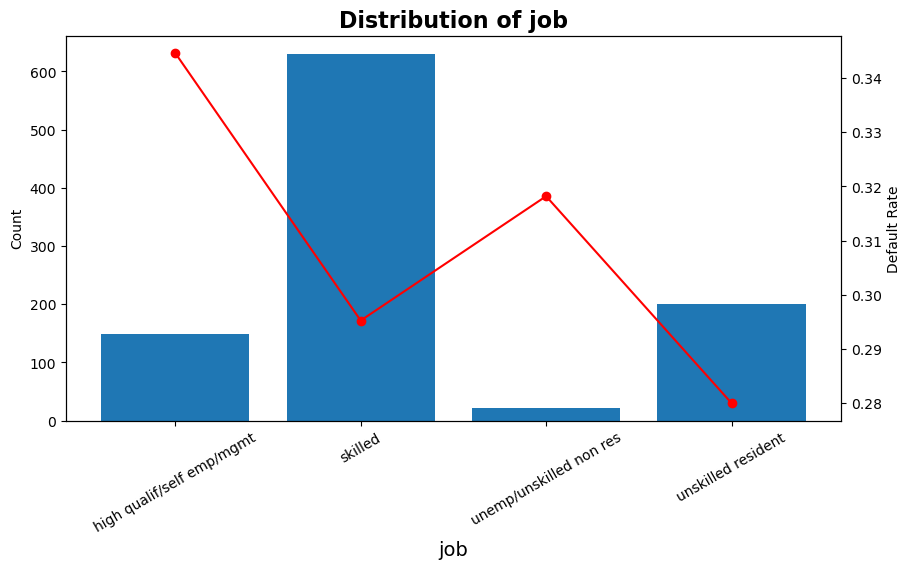

In [42]:
plot_distribution(df_job, 'job')

The distribution for good and bad customers seem to be similar across various categories so job does not seem to influence creditability.

### housing

'own'\
'for free'\
'rent'

In [43]:
df_housing =  groupby_counts(df, 'housing')
print('\nDistribution of housing:\n')
print(df_housing)


Distribution of housing:

    housing  Total  good  bad  DefaultRate
0  for free    108    64   44     0.407407
1       own    713   527  186     0.260870
2      rent    179   109   70     0.391061


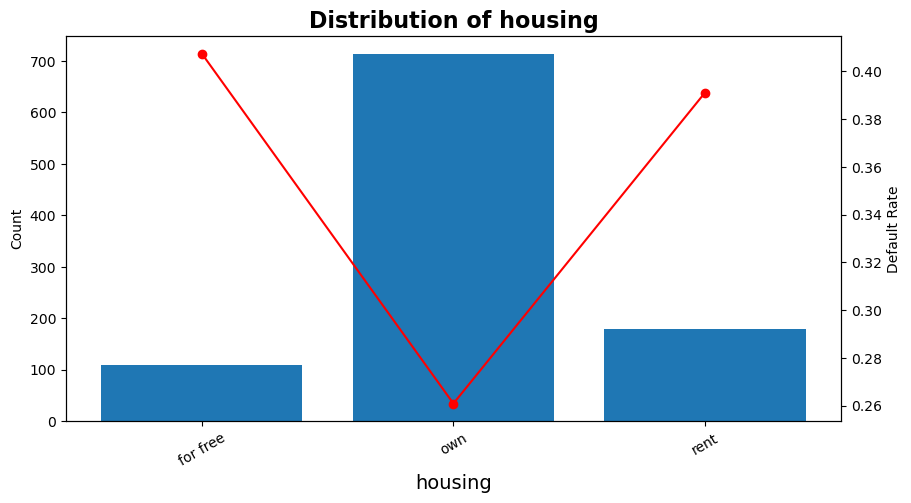

In [44]:
plot_distribution(df_housing, 'housing')

### Purpose

In [45]:
df_purpose =  groupby_counts(df, 'purpose')
print('\nDistribution of purpose:\n')
print(df_purpose)


Distribution of purpose:

               purpose  Total  good  bad  DefaultRate
0             business     97    63   34     0.350515
1   domestic appliance     12     8    4     0.333333
2            education     50    28   22     0.440000
3  furniture/equipment    181   123   58     0.320442
4              new car    234   145   89     0.380342
5                other     12     7    5     0.416667
6             radio/tv    280   218   62     0.221429
7              repairs     22    14    8     0.363636
8           retraining      9     8    1     0.111111
9             used car    103    86   17     0.165049


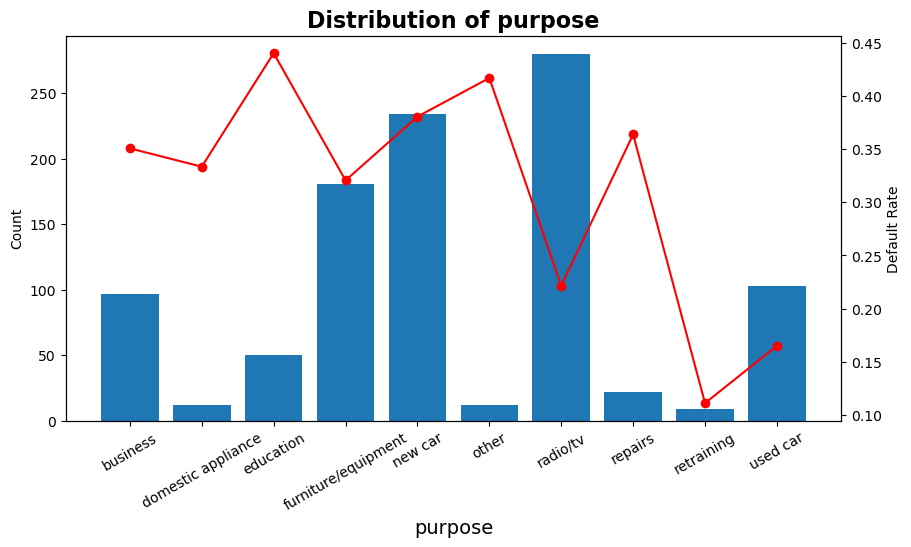

In [46]:
plot_distribution(df_purpose, 'purpose')

From the bar plots, we see that a good customeris is less likely to use the credit amount for a new car than a bad customer, while he/she is more likely to use the credit amount for a used car or a radio/tv than a bad customer.

### employment

In [47]:
df_employment =  groupby_counts(df, 'employment',
                                ['unemployed', '<1', '1<=X<4','4<=X<7', '>=7'])
print('\nDistribution of employment:\n')
print(df_employment)


Distribution of employment:

   employment  Total  good  bad  DefaultRate
0  unemployed     62    39   23     0.370968
1          <1    172   102   70     0.406977
2      1<=X<4    339   235  104     0.306785
3      4<=X<7    174   135   39     0.224138
4         >=7    253   189   64     0.252964


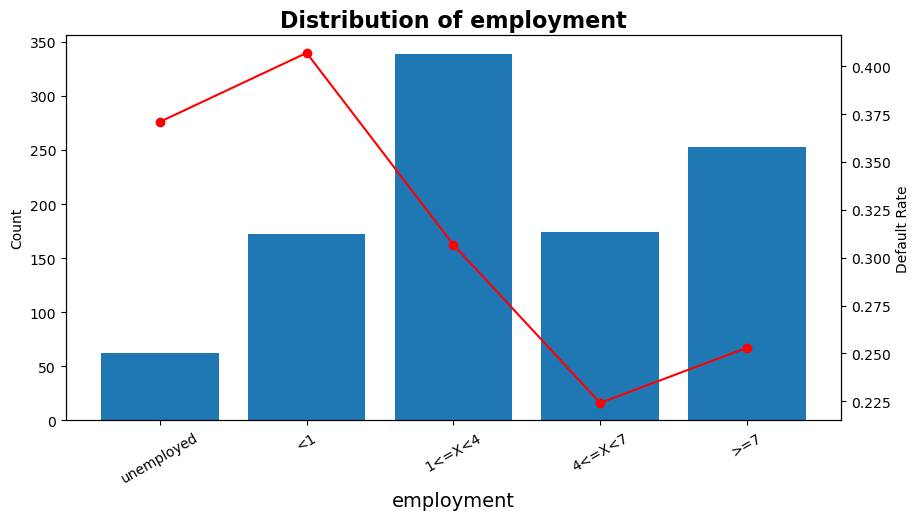

In [48]:
plot_distribution(df_employment, 'employment')

In [49]:
df['employment_new'] = df['employment'].replace({'4<=X<7': '>=4', '>=7': '>=4'})

### Foreign Worker

In [50]:
df_foreign_worker =  groupby_counts(df, 'foreign_worker')
print('\nDistribution of foreign_worker:\n')
print(df_foreign_worker)


Distribution of foreign_worker:

  foreign_worker  Total  good  bad  DefaultRate
0             no     37    33    4     0.108108
1            yes    963   667  296     0.307373


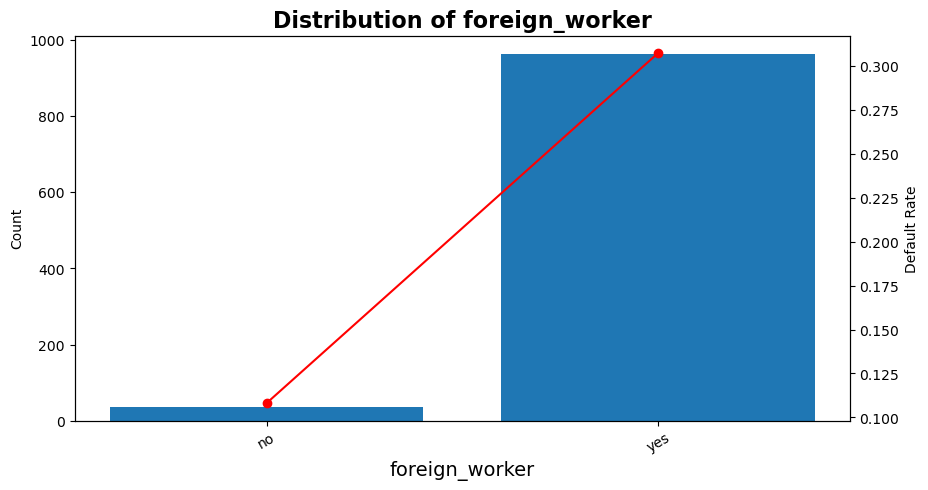

In [51]:
plot_distribution(df_foreign_worker, 'foreign_worker')

### Guarantors

In [52]:
df_guarantors =  groupby_counts(df, 'guarantors')
print('\nDistribution of guarantors:\n')
print(df_guarantors) 


Distribution of guarantors:

     guarantors  Total  good  bad  DefaultRate
0  co applicant     41    23   18     0.439024
1     guarantor     52    42   10     0.192308
2          none    907   635  272     0.299890


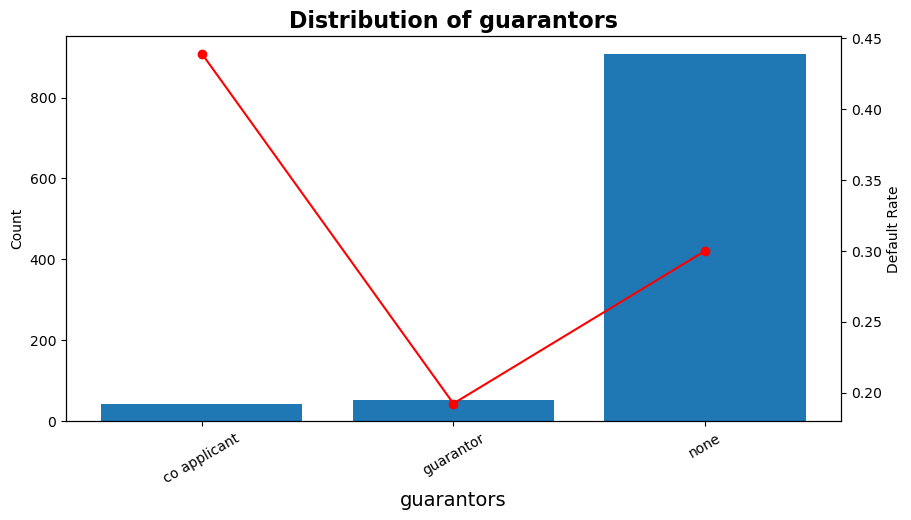

In [53]:
plot_distribution(df_guarantors, 'guarantors')

### Other Payment Plans

In [54]:
df_other_payment_plans =  groupby_counts(df, 'other_payment_plans')
print('\nDistribution of other_payment_plans:\n')
print(df_other_payment_plans) 


Distribution of other_payment_plans:

  other_payment_plans  Total  good  bad  DefaultRate
0                bank    139    82   57     0.410072
1                none    814   590  224     0.275184
2              stores     47    28   19     0.404255


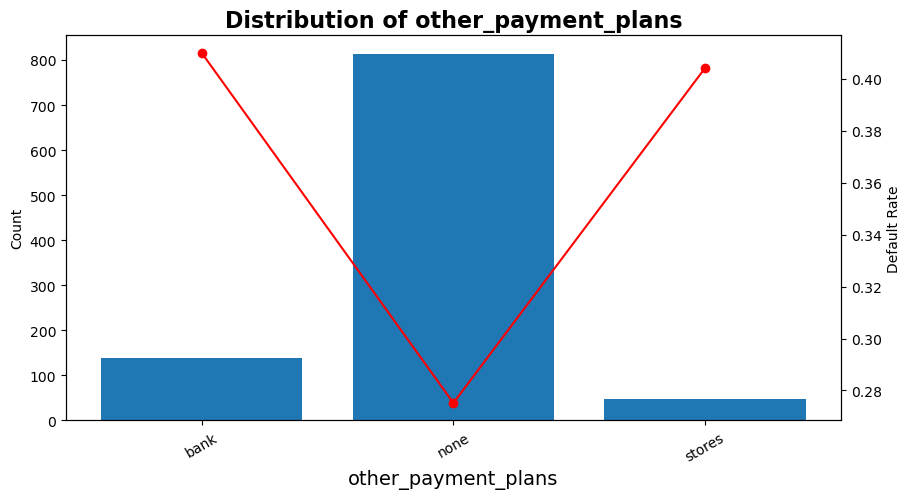

In [55]:
plot_distribution(df_other_payment_plans, 'other_payment_plans')

### Installment rate

In [56]:
df_installment_commitment =  groupby_counts(df, 'installment_commitment')
print('\nDistribution of installment rate:\n')
print(df_installment_commitment) 


Distribution of installment rate:

   installment_commitment  Total  good  bad  DefaultRate
0                       1    136   102   34     0.250000
1                       2    231   169   62     0.268398
2                       3    157   112   45     0.286624
3                       4    476   317  159     0.334034


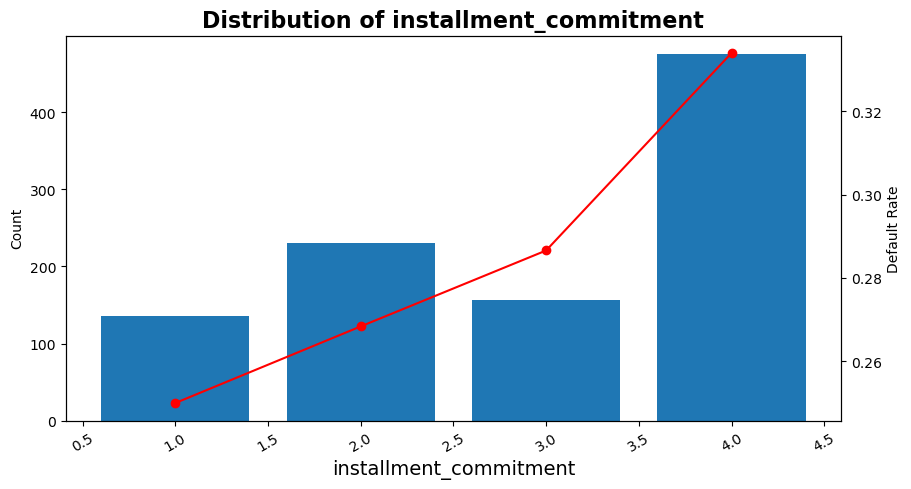

In [57]:
plot_distribution(df_installment_commitment, 'installment_commitment')

### Property Magnitude

In [58]:
df_property_magnitude =  groupby_counts(df, 'property_magnitude')
print('\nDistribution of Property:\n')
print(df_property_magnitude) 


Distribution of Property:

  property_magnitude  Total  good  bad  DefaultRate
0                car    332   230  102     0.307229
1     life insurance    232   161   71     0.306034
2  no known property    154    87   67     0.435065
3        real estate    282   222   60     0.212766


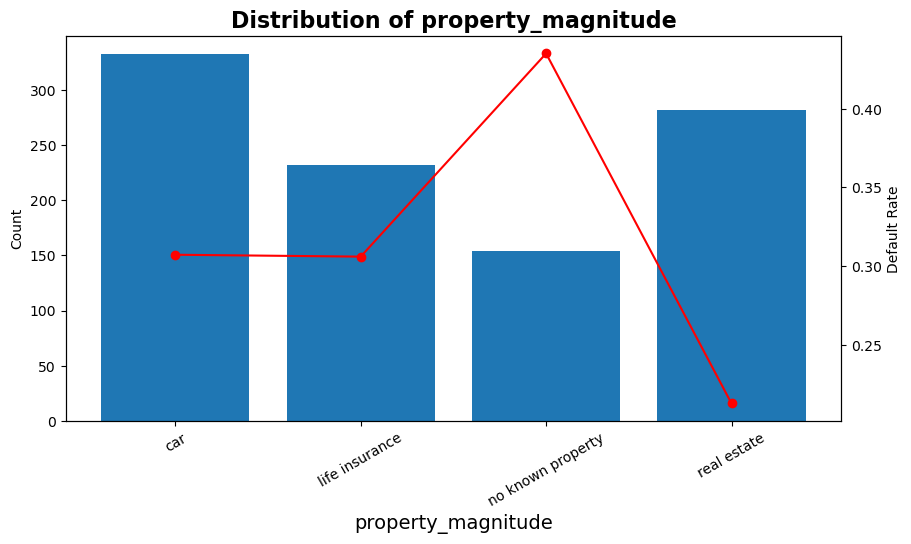

In [59]:
plot_distribution(df_property_magnitude, 'property_magnitude')

## Correlation/Association Analysis

In [60]:
from scipy.stats import chi2_contingency
import numpy as np
# Function to calculate Cramér's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Example: Association between 'purpose' and 'credit_risk'
cramers_v(df['purpose'], df['property_magnitude'])

0.20581752258675273

In [61]:
from scipy.stats import pearsonr, spearmanr
from itertools import combinations

def continuous_correlation_table(df, continuous_cols=None):
    """
    Compute Pearson correlation and p-values for all pairs of continuous variables
    
    Parameters:
    - df: Pandas DataFrame
    - continuous_cols: List of continuous column names (if None, use numeric columns)
    
    Returns:
    - DataFrame with columns: ['variable1', 'variable2', "Pearson's r", "p-value"]
    """
    # Select continuous variables if not specified
    if continuous_cols is None:
        continuous_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Initialize results list
    results = []
    
    # Compute for all unique pairs
    for col1, col2 in combinations(continuous_cols, 2):
        # Remove missing values pairwise
        clean_df = df[[col1, col2]].dropna()
        
        # Initialize defaults
        pearson_rho = pearson_p = np.nan
        spearman_rho = spearman_p = np.nan
        
        try:
            # Pearson correlation
            pearson_rho, pearson_p = pearsonr(clean_df[col1], clean_df[col2])
            
            # Spearman's rank correlation
            spearman_rho, spearman_p = spearmanr(clean_df[col1], clean_df[col2])
        except:
            pass
        
        # Store results
        results.append({
            'variable1': col1,
            'variable2': col2,
            "pearson_rho": pearson_rho,
            "pearson_p": pearson_p,
            'spearman_rho': spearman_rho,
            'spearman_p': spearman_p
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df[results_df['variable1'] != results_df['variable2']]  # Remove self-comparisons    
    return results_df

In [62]:
from scipy.stats import chi2_contingency
from itertools import combinations

def categorical_association_table(df, categorical_columns=None):
    """
    Compute Cramér's V and Chi-Square test for all pairs of categorical variables.
    Returns results in a row-wise format (long format).
    
    Parameters:
    - df: Pandas DataFrame
    - categorical_columns: List of categorical column names (if None, use all object/bool columns)
    
    Returns:
    - DataFrame with columns: ['variable1', 'variable2', "Cramér's V", "Chi-Square p-value"]
    """
    # Select categorical columns if not provided
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    
    # Initialize results list
    results = []
    
    # Compute for all unique pairs
    for col1, col2 in combinations(categorical_columns, 2):
        # Create contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Chi-Square test
        try:
            chi2, p, _, _ = chi2_contingency(contingency_table)
        except:
            chi2, p = np.nan, np.nan
        
        # Cramér's V
        try:
            cv = cramers_v(df[col1], df[col2])
        except:
            cv = np.nan
        
        # Store results
        results.append({
            'variable1': col1,
            'variable2': col2,
            "Cramér's V": cv,
            "Chi-Square p-value": p
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df[results_df['variable1'] != results_df['variable2']]  # Remove self-comparisons
    
    return results_df

### **Numeric Columns**

In [63]:
corr_table = continuous_correlation_table(df)
corr_table.sort_values(by="pearson_rho", ascending=False)

,variable1,variable2,pearson_rho,pearson_p,spearman_rho,spearman_p
6,credit_amount,duration,0.624984,1.862851e-109,0.624709,2.469459e-109
5,age,residence_since,0.266419,1.037262e-17,0.234709,5.556995e-14
2,age,existing_credits,0.149254,2.132063e-06,0.141287,7.298173e-06
4,age,num_dependents,0.118201,1.794593e-04,0.190651,1.222957e-09
16,existing_credits,num_dependents,0.109667,5.125481e-04,0.096978,2.139749e-03
17,existing_credits,residence_since,0.089625,4.563045e-03,0.067193,3.362256e-02
12,duration,installment_commitment,0.074749,1.807312e-02,0.118046,1.830230e-04
3,age,installment_commitment,0.058266,6.550689e-02,0.072157,2.249409e-02
19,installment_commitment,residence_since,0.049302,1.192154e-01,0.047507,1.332839e-01
20,num_dependents,residence_since,0.042643,1.778418e-01,0.040455,2.011748e-01


### **Categorical Columns**

In [64]:
cat_columns = [
 'foreign_worker',
 'housing',
 'job',
 'guarantors',
 'other_payment_plans',
 'property_magnitude',
 'purpose',
 'account_bal_new',
 'credit_history_new',
 'personal_status_new',
 'savings_value_new',
 'employment_new']

In [65]:
association_table = categorical_association_table(df, cat_columns)
print(association_table.sort_values(by="Cramér's V", ascending=False))

              variable1            variable2  Cramér's V  Chi-Square p-value
14              housing   property_magnitude    0.553181       5.960170e-129
29                  job       employment_new    0.308619        2.755769e-56
15              housing              purpose    0.210169        2.861352e-11
45   property_magnitude              purpose    0.205818        6.347286e-15
24                  job              purpose    0.202844        2.748555e-14
..                  ...                  ...         ...                 ...
19              housing    savings_value_new    0.033892        6.812429e-01
35           guarantors  personal_status_new    0.033027        7.024008e-01
34           guarantors   credit_history_new    0.026766        8.384659e-01
43  other_payment_plans    savings_value_new    0.015325        9.763828e-01
9        foreign_worker    savings_value_new    0.003395        9.942521e-01

[66 rows x 4 columns]


In [66]:
# Filter for practical significance
meaningful_associations = association_table[
    (association_table["Chi-Square p-value"] < 0.05) & 
    (association_table["Cramér's V"] >= 0.20)  # Moderate or stronger
].sort_values("Cramér's V", ascending=False)

meaningful_associations

,variable1,variable2,Cramér's V,Chi-Square p-value
14,housing,property_magnitude,0.553181,5.960170e-129
29,job,employment_new,0.308619,2.755769e-56
15,housing,purpose,0.210169,2.861352e-11
45,property_magnitude,purpose,0.205818,6.347286e-15
24,job,purpose,0.202844,2.748555e-14


In [67]:
import seaborn as sns

def plot_categorical_heatmap(df, var1, var2):
    """
    Plot a heatmap showing frequency relationships between two categorical variables
    
    Parameters:
    - df: DataFrame
    - var1: First categorical variable (str)
    - var2: Second categorical variable (str)
    """
    # Create contingency table
    crosstab = pd.crosstab(df[var1], df[var2])
    
    # Create plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, 
                annot=True, 
                fmt='d', 
                cmap='coolwarm', 
                linewidths=.5,
                cbar_kws={'label': 'Count'})
    
    plt.title(f'Relationship between {var1} and {var2}', pad=20)
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()

### Housing vs Property

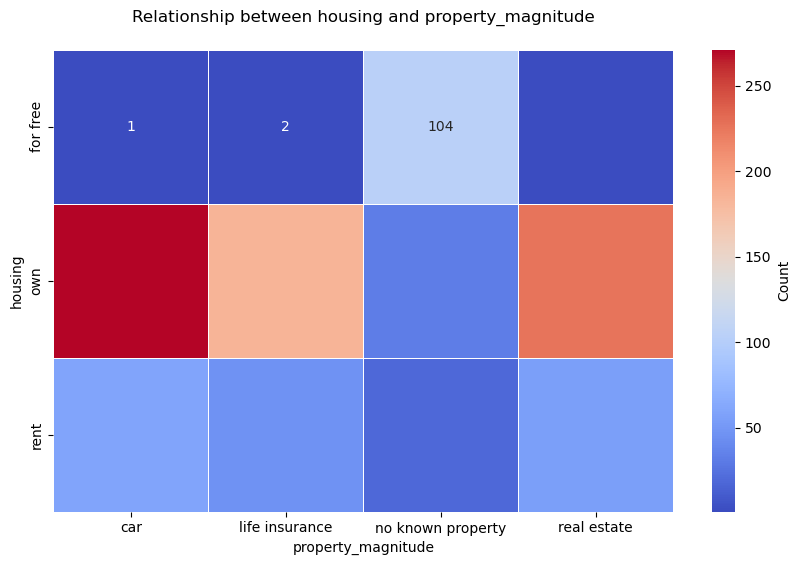

In [68]:
plot_categorical_heatmap(df, 'housing', 'property_magnitude')

### Job vs Employment

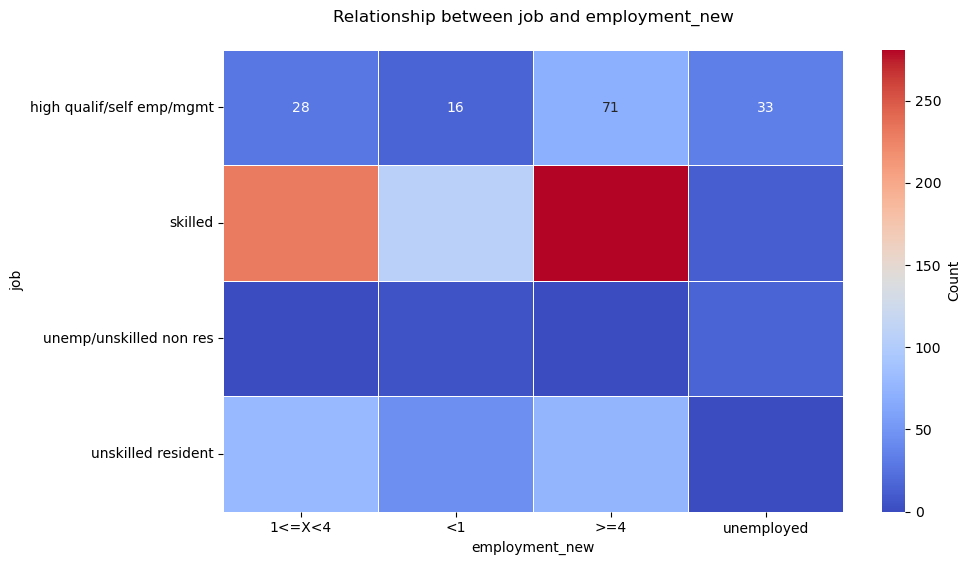

In [69]:
plot_categorical_heatmap(df, 'job', 'employment_new')

### Housing vs Purpose

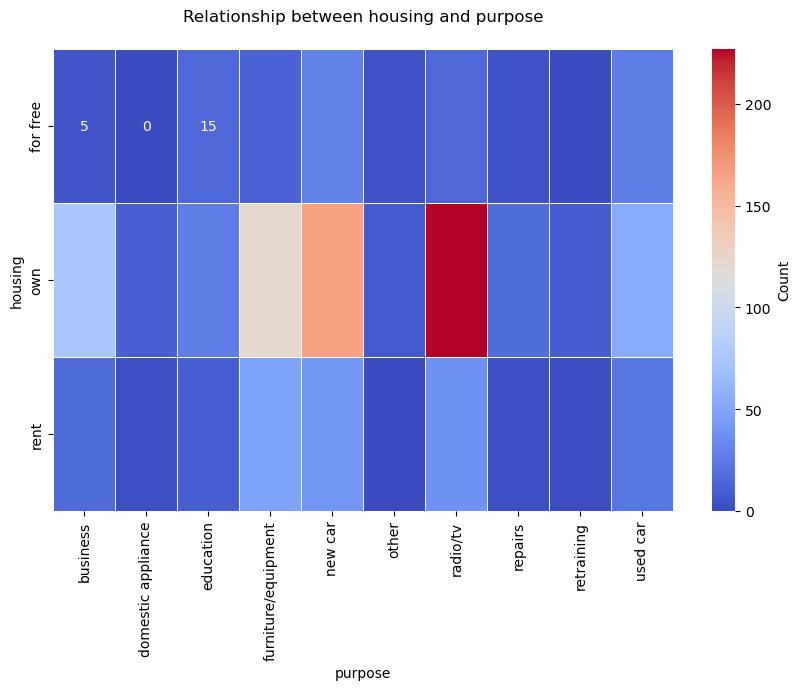

In [70]:
plot_categorical_heatmap(df, 'housing', 'purpose')

### Job vs Purpose

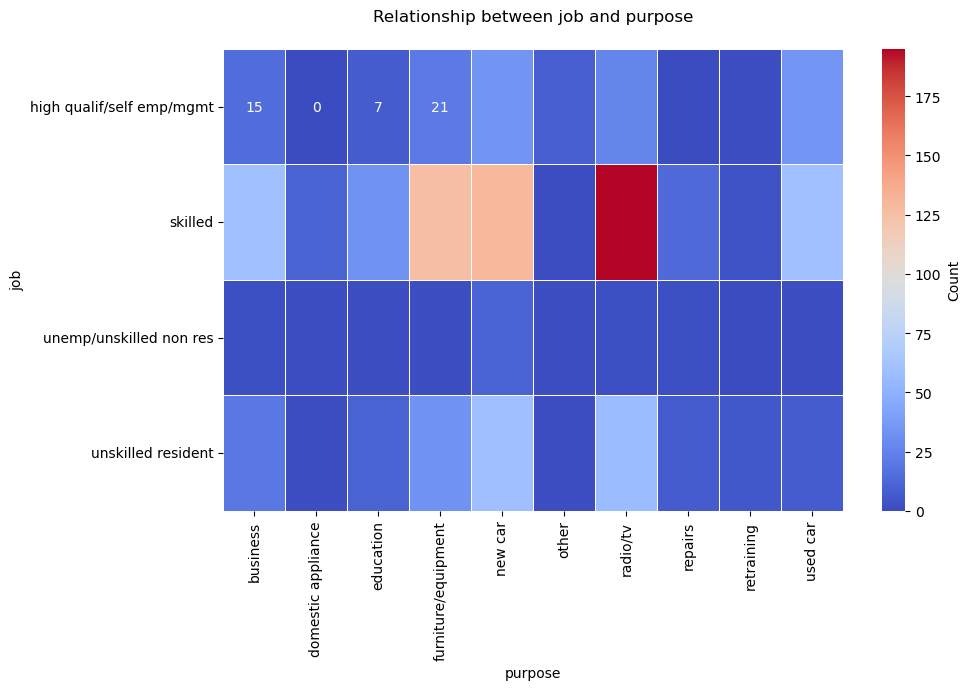

In [71]:
plot_categorical_heatmap(df, 'job', 'purpose')

## Perform Modeling Techniques

**LogisticRegression**

In [306]:
df.columns

Index(['age', 'account_bal', 'credit_class', 'credit_amount', 'credit_history',
       'duration', 'employment', 'existing_credits', 'foreign_worker',
       'housing', 'installment_commitment', 'job', 'num_dependents',
       'guarantors', 'other_payment_plans', 'own_telephone', 'personal_status',
       'property_magnitude', 'purpose', 'residence_since', 'savings_value',
       'account_bal_new', 'credit_history_new', 'personal_status_new',
       'savings_value_new', 'employment_new'],
      dtype='object')

In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats

In [72]:
X = pd.get_dummies(df[['account_bal_new', 
                       'credit_history_new', 
                       'credit_amount',
                       'age',
                       'duration',
                       'personal_status_new', 
                       'num_dependents', 
                       'savings_value_new', 
                    #   'job', 
                       'housing', 
                    #   'purpose', 
                       'employment_new',
                       'foreign_worker',
                       'guarantors',
                       'other_payment_plans', 
                       'installment_commitment', 
                     #  'property_magnitude'
                       ]],drop_first=True)

y = df['credit_class'].map({'good':0, 'bad':1})

In [75]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12,stratify=df['credit_class'] )

In [76]:
X_train.shape

(750, 23)

In [122]:
LogisticModel = LogisticRegression(max_iter=10000, random_state=12)
LogisticModel.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=12)

In [128]:
y_prob = LogisticModel.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [129]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': LogisticModel.coef_[0]
}).sort_values('Feature', ascending=False)

coef_df

,Feature,Coefficient
12,savings_value_new_no known savings,-0.692660
11,savings_value_new_>=500,-0.401275
10,personal_status_new_male mar/wid/single,0.476450
9,personal_status_new_male div/sep,0.781425
22,other_payment_plans_stores,0.599928
21,other_payment_plans_none,-0.150590
3,num_dependents,-0.947360
4,installment_commitment,-0.010012
14,housing_rent,0.736529
13,housing_own,0.107432


In [130]:
print(confusion_matrix(y_test, y_pred))

[[122  53]
 [ 38  37]]


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       175
           1       0.41      0.49      0.45        75

    accuracy                           0.64       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.66      0.64      0.64       250



In [132]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
sm = SMOTE(sampling_strategy='auto')

X_train_re, y_train_re = sm.fit_resample(X_train, y_train)

In [135]:
LogisticModel = LogisticRegression(max_iter=10000, random_state=12)
LogisticModel.fit(X_train_re, y_train_re)

LogisticRegression(max_iter=10000, random_state=12)

In [136]:
y_prob = LogisticModel.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [137]:
print(confusion_matrix(y_test, y_pred))

[[128  47]
 [ 37  38]]


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       175
           1       0.45      0.51      0.48        75

    accuracy                           0.66       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.68      0.66      0.67       250



In [ ]:
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

**RandomForest**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [97]:
# Initialize the model with class weighting to handle imbalance
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=13,
    class_weight='balanced'  # Adjusts for class imbalance
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=13)

In [98]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [99]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[158  17]
 [ 55  20]]


In [100]:
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       175
           1       0.54      0.27      0.36        75

    accuracy                           0.71       250
   macro avg       0.64      0.58      0.59       250
weighted avg       0.68      0.71      0.68       250



**RandomForest with Gridsearch (optimal parameters)**

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='f1_macro'  # Focus on F1-score for both classes
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [104]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [105]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[142  33]
 [ 35  40]]


In [106]:
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       175
           1       0.55      0.53      0.54        75

    accuracy                           0.73       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.73      0.73      0.73       250



In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1 (bad credit)
y_probs = best_rf.predict_proba(X_test)[:, 1]  # For Random Forest

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

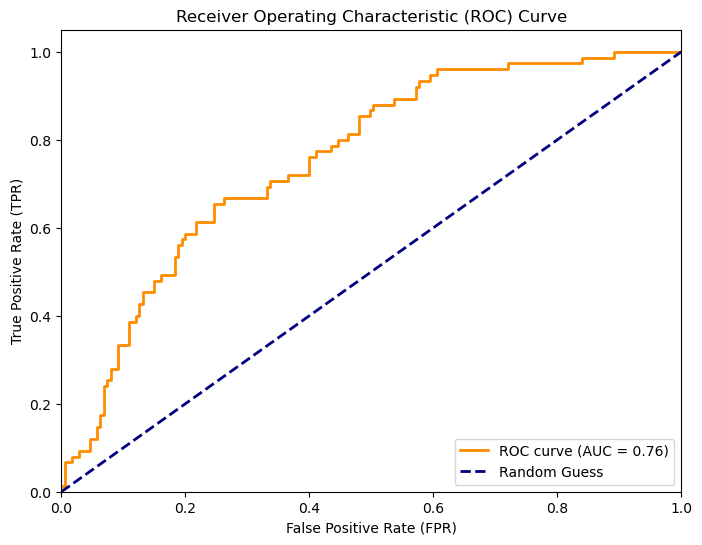

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()